# Análise exploratória de dados

## 1. Descrição dos dados

### 1.1 Configurações iniciais

In [23]:
#Importações de bibliotecas
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [24]:
data_path = Path('../data/raw/data.csv')
df = pd.read_csv(data_path) #Obtendo o dataset

df.head() #Visualizando as 5 primeiras linhas do dataset

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

### 1.2 Dicionário de dados

|Variavel             |Significado                                                                      |Tipo    |
|---------------------|---------------------------------------------------------------------------------|--------|
|GENDER               |Indica o genêro do paciente                                                      |Nominal |
|AGE                  |Indica a idade do paciente                                                       |Discreta|
|SMOKING              |Indica se o paciente é fumante                                                   |Nominal |
|YELLOW_FINGERS       |Indica se o paciente possui as extremidades do corpo amareladas                  |Nominal |
|ANXIETY              |Indica se o paciente apresenta sinais de transtorno de ansiedade                 |Nominal |
|PEER_PRESSURE        |Indica se o paciente, por volta da adolescencia, foi influenciado a fumar        |Nominal |
|CHRONIC DISEASE      |Indica se o paciente possui alguma comorbidade cronica                           |Nominal |
|FATIGUE              |Indica se o paciente apresenta sinais de cansasso frequentes                     |Nominal |
|ALLERGY              |Indica se o paciente possui alergia a fumaça do cigarro                          |Nominal |
|WHEEZING             |Indica se o paciente apresenta um chiado no pulmão                               |Nominal |
|ALCOHOL CONSUMING    |Indica se o paciente consome alcool frequente                                    |Nominal |
|COUGHING             |Indica se o paciente apresenta tosse frequente                                   |Nominal |
|SHORTNESS OF BREATH  |Indica se o paciente possui respiração curta                                     |Nominal |
|SWALLOWING DIFFICULTY|Indica se o paciente posui dificuldade para ingerir alimentos sólidos ou liquidos|Nominal |
|CHEST PAIN           |Indica se o paciente apresenta dor no peito                                      |Nominal |
|LUNG_CANCER          |Indica se o paciente possui cancêr de pulmão                                     |Nominal |

Com isso notamos que há **16 variáveis**, sendo 14 nominais e 2 discretas. A variável alvo é a `LUNG_CANCER` que indica se o paciente possui cancêr de pulmão ou não.

**Nota:** A variável `AGE` é discreta pois ela é um número inteiro que representa a idade do paciente.
***

#### 1.2.1 Agrupamento de variáveis

|Grupo                |Variáveis                                                                     
|---------------------|---------------------------------------------------------------------------------
|`Sintoma`            |`SMOKING`, `YELLOW_FINGERS`, `ANXIETY`, `PEER_PRESSURE`, `CHRONIC DISEASE`, `FATIGUE`,  `ALLERGY`, `WHEEZING`, `ALCOHOL CONSUMING`, `COUGHING`, `SHORTNESS OF BREATH`, `SWALLOWING DIFFICULTY`, `CHEST PAIN`                                                    
|`Identificação`      |`NAME`, `AGE`, `GENDER`
**Nota:** `LUNG_CANCER` não foi incluída em nenhum grupo pois é a variável alvo.

#### 1.2.2 Mapeamento de variáveis

Como visto no dicionário de dados, o conjunto se encontra em inglês, podemos mapear as variáveis para o português para facilitar a visualização dos dados.

In [26]:
#Traduzindo as variáveis para o português
df_view = df.copy()
dict_columns = {
    'GENDER': 'Gênero',
    'AGE': 'Idade',
    'SMOKING': 'Fumante',
    'YELLOW_FINGERS': 'Dedos amarelados',
    'ANXIETY': 'Ansiedade',
    'PEER_PRESSURE' : 'Pressão grupal',
    'CHRONIC DISEASE' : 'Doença crônica',
    'FATIGUE ' : 'Fadiga',
    'ALLERGY ' : 'Alergia',
    'WHEEZING' :  'Pieira',
    'ALCOHOL CONSUMING' : 'Consumo acoólico',
    'COUGHING' : 'Tosse',
    'SHORTNESS OF BREATH' : 'Falta de ar',
    'SWALLOWING DIFFICULTY' : 'Dificuldade de ingestão',
    'CHEST PAIN' : 'Dor torárica',
    'LUNG_CANCER' : 'Câncer Pulmonar',
}
df_view.rename(columns=dict_columns, inplace=True)

df_view.head()

,Gênero,Idade,Fumante,Dedos amarelados,Ansiedade,Pressão grupal,Doença crônica,Fadiga,Alergia,Pieira,Consumo acoólico,Tosse,Falta de ar,Dificuldade de ingestão,Dor torárica,Câncer Pulmonar
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


### 1.3 Dados faltantes

In [27]:
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

**É perceptível que a grande maioria das entradas são de indivíduos que tem mais de 50 anos, o que pode significar que talvez exista uma relação direta entre a idade e a chance de contrair câncer pulmonar, uma vez que (como visto no gráfico anterior), o conjunto em sua maioria é composto por casos confirmados da doença.**

## 2. Perguntas de partida e hipóteses

### 2.1 Informações Gerais
Com visualizações de informações gerais poderemos responder a pergutnas do tipo:

- Qual a quantidade de casos confirmados de cancer de pulmão?
- Qual a distribuição de gênero dos pacientes?
- Qual a distribuição de idade dos pacientes?
- Qual a distribuição dos pacientes que possuem sintomas?

## 3. Insights

### 3.1 Distribuição de variáveis

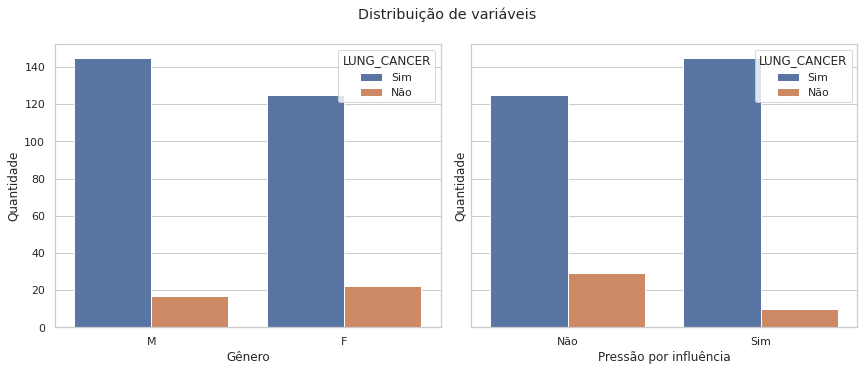

In [29]:
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5), sharey=True)
fig.suptitle('Distribuição de variáveis')
fig.tight_layout()
sns.countplot(ax=axes[0], x=df['GENDER'], data=df, hue=df['LUNG_CANCER'])
sns.countplot(ax=axes[1], x=df['PEER_PRESSURE'], data=df, hue=df['LUNG_CANCER'])
axes[0].set(xlabel="Gênero", ylabel="Quantidade")
axes[1].set(xlabel="Pressão por influência", ylabel="Quantidade")
plt.show()

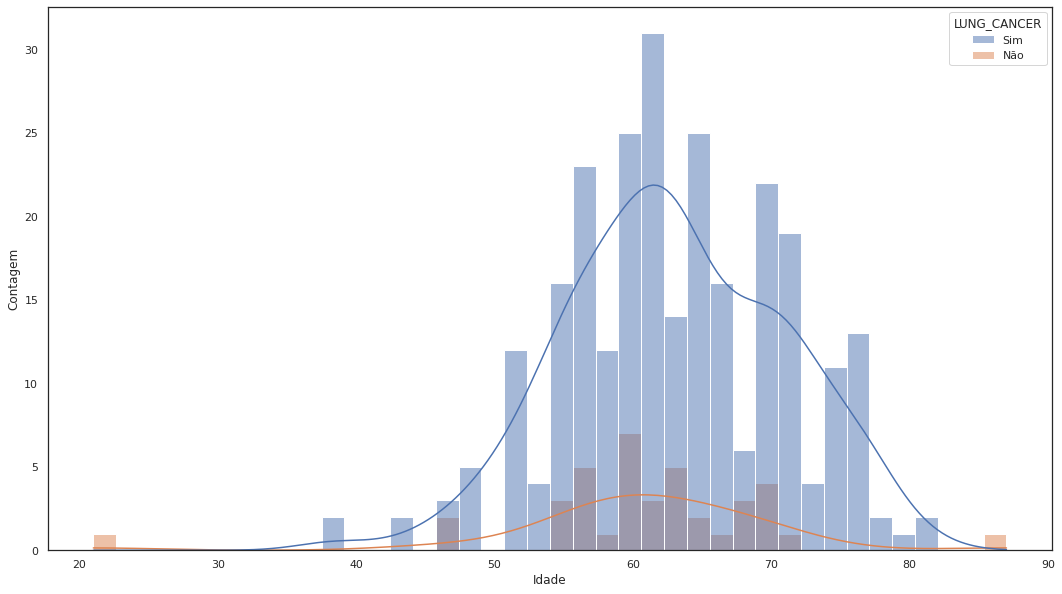

In [30]:
plt.figure(figsize=(18,10))
sns.set_theme(style="white") #Removendo o whitegrid para esse gráfico
ax = sns.histplot(data=df, x='AGE', bins=40, kde=True, hue=df['LUNG_CANCER'])
ax.set(xlabel='Idade', ylabel='Contagem')
plt.show()